Implement a KNN model to classify the animals in to categorie

In [3]:
import pandas as pd
import numpy as np

In [4]:
zoo=pd.read_csv('Zoo.csv')

In [5]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo.shape

(101, 18)

In [8]:
zoo = zoo.rename({'animal name': 'animal_name'}, axis=1)

In [9]:
zoo = pd.get_dummies(zoo, columns = ['animal_name'])

In [10]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_tuatara,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


moving type column target to the end of dataset

In [11]:
zoo_pop = zoo.pop("type")

In [12]:
zoo.insert(116, "type", zoo_pop)


In [13]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren,type
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [14]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [15]:
array = zoo.values
X = array[:, 0:-1]
Y = array[:,-1]

deviding dataset into predictor and target 

In [16]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [17]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=1)

In [50]:
x_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [51]:
y_train

array([4, 1, 1, 1, 2, 3, 1, 7, 6, 1, 2, 4, 2, 2, 1, 7, 1, 2, 1, 4, 5, 7,
       2, 2, 6, 1, 3, 5, 1, 2, 6, 1, 1, 6, 1, 7, 4, 4, 1, 3, 2, 1, 4, 1,
       4, 6, 7, 1, 4, 7, 1, 1, 2, 4, 2, 1, 5, 1, 2, 3, 1, 2, 1, 2, 1, 1,
       1, 7, 4, 2], dtype=int64)

plotting elbow to find optimal number of n in knn

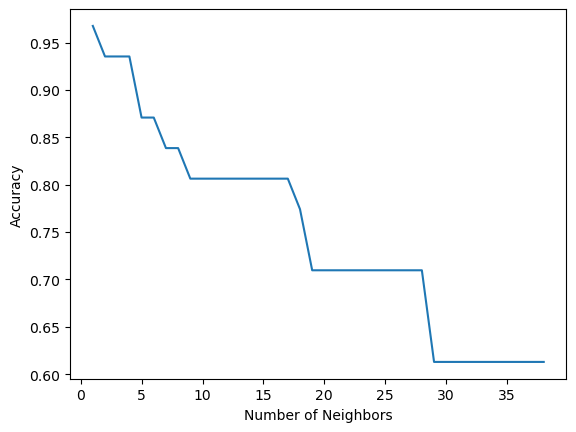

In [52]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

for n in range(1, 39):
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    # Calculating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy values against the value of n
plt.plot(range(1, 39), accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see we cannot find n using elbow plot

using cross validation to find the optimal value of n

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# create a list of possible values for n
n_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# use a for loop to evaluate the model for each value of n
for n in n_values:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    print(f'n = {n}, Cross-validation accuracy: {scores.mean():.3f}')

n = 1, Cross-validation accuracy: 0.929
n = 3, Cross-validation accuracy: 0.829
n = 5, Cross-validation accuracy: 0.786
n = 7, Cross-validation accuracy: 0.771
n = 9, Cross-validation accuracy: 0.771
n = 11, Cross-validation accuracy: 0.771
n = 13, Cross-validation accuracy: 0.771
n = 15, Cross-validation accuracy: 0.729
n = 17, Cross-validation accuracy: 0.700
n = 19, Cross-validation accuracy: 0.700


C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rajiv\anaconda3\lib\s

we will try to choose the higher n will produce less total error with highest accuracy that is n=3

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
preds = model.predict(x_test)
preds_train = model.predict(x_train)

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [60]:
metrics.accuracy_score(preds_train,y_train)

0.9857142857142858

In [61]:
metrics.accuracy_score(preds,y_test)

0.9354838709677419